In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## As we can see there no missing or null values in the data set we can move on to analysis part.

In [5]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
bike["weathersit"] = pd.Categorical(bike.weathersit)
bike["season"] = pd.Categorical(bike.season)
bike["mnth"] = pd.Categorical(bike.mnth)
bike["holiday"] = pd.Categorical(bike.holiday)
bike["yr"] = pd.Categorical(bike.yr)
bike["weekday"] = pd.Categorical(bike.weekday)
bike["workingday"] = pd.Categorical(bike.workingday)


bike.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Now let visualize the data set and  check if there is any multicollinearity between the variables

<Figure size 1080x360 with 0 Axes>

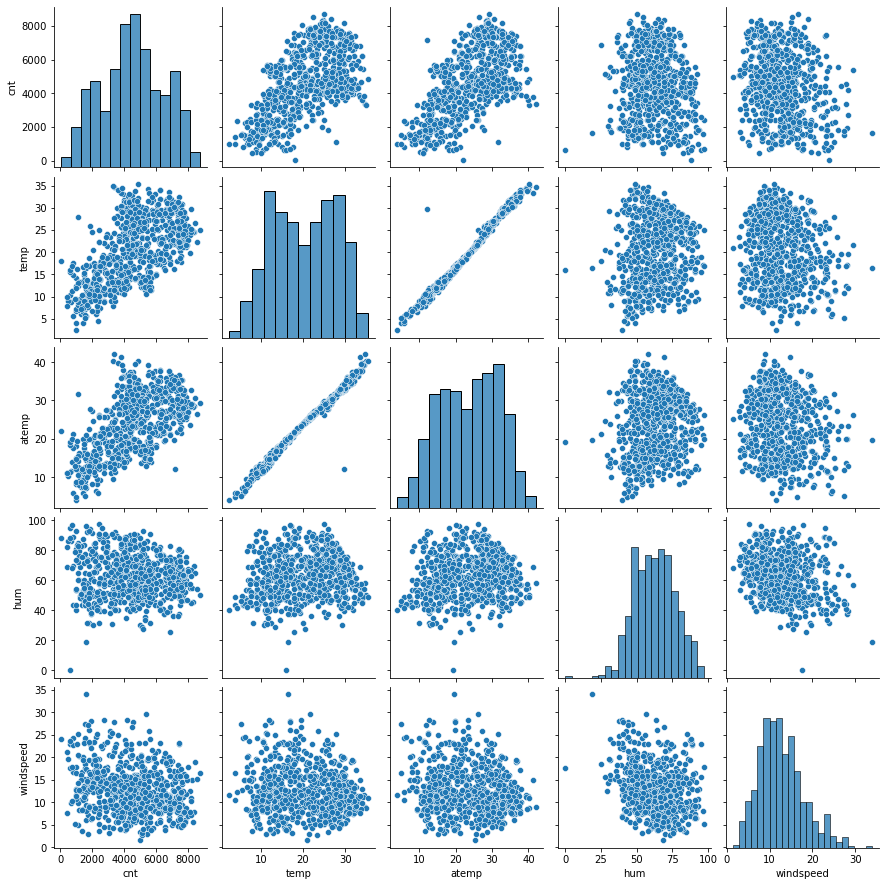

In [9]:
plt.figure(figsize=(15,5))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

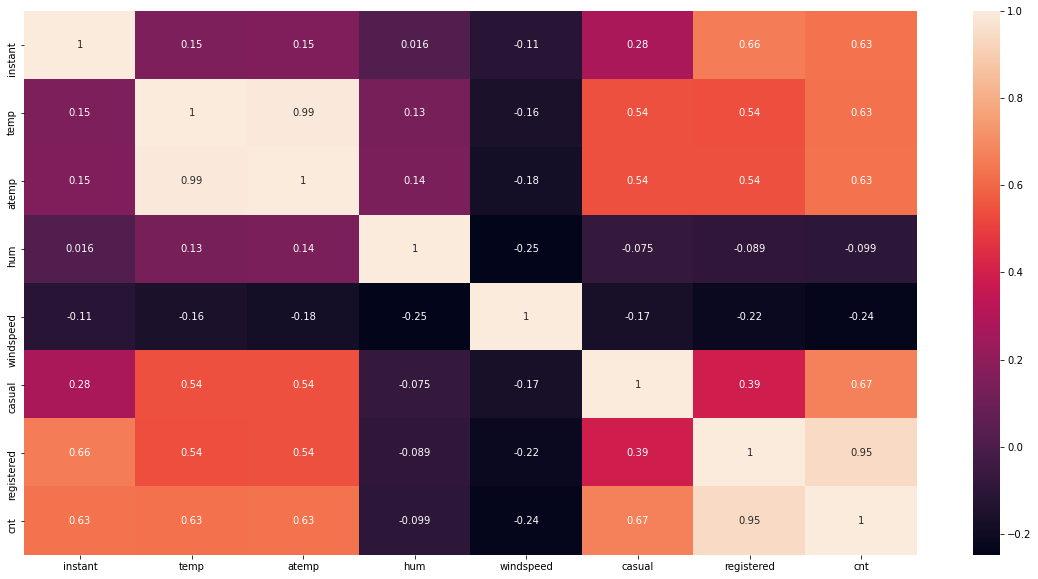

In [10]:
plt.figure(figsize = (20, 10))
sns.heatmap(bike.corr(), annot = True)
plt.show()

### Interpretation from Above Heatmap
1. temp And atemp have high correlation with each other.
2. windspeed is negatively correlation with cnt.
3. hum and windspeed are also negatively correlated.

## Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

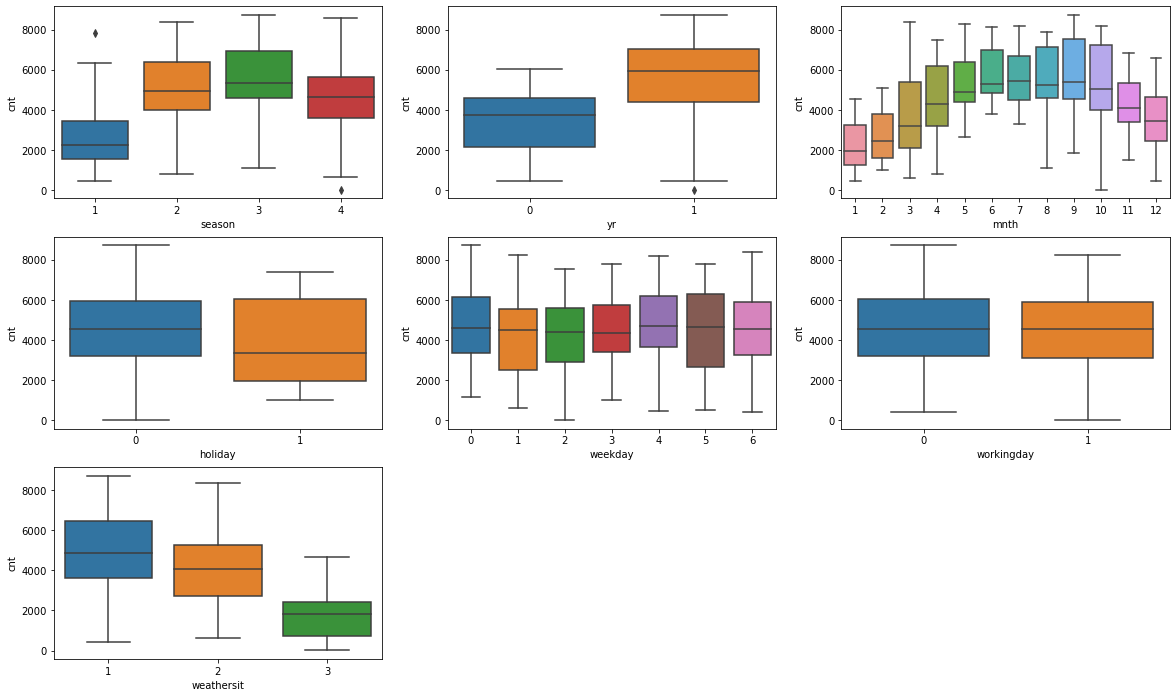

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

### Interpretation from Above graph

1. Season 3 i.e fall has highest number of cnt.
2. Year 2019 shows higher number cnt compare to Year 2018.
3. Month of October show a cnt of '0' may be due to bad weather.
4. cnt for holiday is less than that of working day.
5. one of cnt value for tuesday i.e 2 for weekday is '0'.
6. cnt value is less for holiday than workingday.
7. As there is no graph for cnt vs weathersit '4' we can say that cnt value for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is zero.

# Data Preparation
1. We can see from data that 'yr' and 'dteday' have same data. So we should drop one of them. As 'yr' will be needed for future ananlysis, we are going to drop 'dteday'.
2. 'casual' and 'registered' variable are included in our target variable i.e 'cnt' so we have to drop them.
3. We need to create dummy variable for some categorical variable like season,weekday and weathersit.

In [12]:
bike.drop(['casual','registered', 'dteday', 'instant'],axis=1,inplace=True)
bike.head()

season yr mnth holiday weekday workingday weathersit       temp     atemp  \
0      1  0    1       0       1          1          2  14.110847  18.18125   
1      1  0    1       0       2          1          2  14.902598  17.68695   
2      1  0    1       0       3          1          1   8.050924   9.47025   
3      1  0    1       0       4          1          1   8.200000  10.60610   
4      1  0    1       0       5          1          1   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [13]:
import calendar

In [14]:
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
bike['mnth']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [15]:
bike['season'] = bike['season'].map({1: 'Spring' , 2: 'Summer' , 3: 'Fall' , 4: 'Winter'})
bike['season']

0      Spring
1      Spring
2      Spring
3      Spring
4      Spring
        ...  
725    Spring
726    Spring
727    Spring
728    Spring
729    Spring
Name: season, Length: 730, dtype: category
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

In [16]:
bike['weathersit'] = bike['weathersit'].map({1: 'Clear' , 2: 'Mist & Cloudy' , 3: 'Light Snow & Rain' , 4: 'Heavy Snow & Rain'})
bike['weathersit']

0      Mist & Cloudy
1      Mist & Cloudy
2              Clear
3              Clear
4              Clear
           ...      
725    Mist & Cloudy
726    Mist & Cloudy
727    Mist & Cloudy
728            Clear
729    Mist & Cloudy
Name: weathersit, Length: 730, dtype: category
Categories (3, object): ['Clear', 'Mist & Cloudy', 'Light Snow & Rain']

In [17]:
#bike['weekday'] = bike['weekday'].apply(lambda x: calendar.day_abbr[x])

In [18]:
bike['weekday'] = bike['weekday'].map({0: 'Sunday' , 1: 'Monday' , 2: 'Tuesday' , 3: 'Wednesday' , 4: 'Thursday' , 5: 'Friday' , 6: 'Saturday'})
bike ['weekday']

0         Monday
1        Tuesday
2      Wednesday
3       Thursday
4         Friday
         ...    
725       Friday
726     Saturday
727       Sunday
728       Monday
729      Tuesday
Name: weekday, Length: 730, dtype: category
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [19]:
bike.head()

season yr mnth holiday    weekday workingday     weathersit       temp  \
0  Spring  0  Jan       0     Monday          1  Mist & Cloudy  14.110847   
1  Spring  0  Jan       0    Tuesday          1  Mist & Cloudy  14.902598   
2  Spring  0  Jan       0  Wednesday          1          Clear   8.050924   
3  Spring  0  Jan       0   Thursday          1          Clear   8.200000   
4  Spring  0  Jan       0     Friday          1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Creating Dummy Variables

In [20]:
dum = bike[['mnth' , 'season' , 'weekday' , 'weathersit']]

In [21]:
dum = pd.get_dummies(dum , drop_first= True)
dum

mnth_Feb  mnth_Mar  mnth_Apr  mnth_May  mnth_Jun  mnth_Jul  mnth_Aug  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
725         0         0         0         0         0         0         0   
726         0         0         0         0         0         0         0   
727         0         0         0         0         0         0         0   
728         0         0         0         0         0         0         0   
729         0         0         0         0         0         0         0   

     mnth_Sep  mnth_Oct  mnth_Nov  ...  season_Fall  season_Winter  \
0           0         0         0  ...            0              0   
1           0         0         0  ...            0              0   
2           0         0         0  ...            0              0   
3           0         0         0  ...            0              0   
4           0         0         0  ...            0              0   
..        ...       ...       ...  ...          ...            ...   
725         0         0         0  ...            0              0   
726         0         0         0  ...            0              0   
727         0         0         0  ...            0              0   
728         0         0         0  ...            0              0   
729         0         0         0  ...            0              0   

     weekday_Monday  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0                 1                0                  0                 0   
1                 0                1                  0                 0   
2                 0                0                  1                 0   
3                 0                0                  0                 1   
4                 0                0                  0                 0   
..              ...              ...                ...               ...   
725               0                0                  0                 0   
726               0                0                  0                 0   
727               0                0                  0                 0   
728               1                0                  0                 0   
729               0                1                  0                 0   

     weekday_Friday  weekday_Saturday  weathersit_Mist & Cloudy  \
0                 0                 0                         1   
1                 0                 0                         1   
2                 0                 0                         0   
3                 0                 0                         0   
4                 1                 0                         0   
..              ...               ...                       ...   
725               1                 0                         1   
726               0                 1                         1   
727               0                 0                         1   
728               0                 0                         0   
729               0                 0                         1   

     weathersit_Light Snow & Rain  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
..                            ...  
725                             0  
726                             0  
727                             0  
728                             0  
729                             0  

[730 rows x 22 columns]

In [22]:
bike = pd.concat([bike, dum] , axis=1)
bike.head()

season yr mnth holiday    weekday workingday     weathersit       temp  \
0  Spring  0  Jan       0     Monday          1  Mist & Cloudy  14.110847   
1  Spring  0  Jan       0    Tuesday          1  Mist & Cloudy  14.902598   
2  Spring  0  Jan       0  Wednesday          1          Clear   8.050924   
3  Spring  0  Jan       0   Thursday          1          Clear   8.200000   
4  Spring  0  Jan       0     Friday          1          Clear   9.305237   

      atemp      hum  ...  season_Fall  season_Winter  weekday_Monday  \
0  18.18125  80.5833  ...            0              0               1   
1  17.68695  69.6087  ...            0              0               0   
2   9.47025  43.7273  ...            0              0               0   
3  10.60610  59.0435  ...            0              0               0   
4  11.46350  43.6957  ...            0              0               0   

   weekday_Tuesday  weekday_Wednesday  weekday_Thursday  weekday_Friday  \
0                0                  0                 0               0   
1                1                  0                 0               0   
2                0                  1                 0               0   
3                0                  0                 1               0   
4                0                  0                 0               1   

   weekday_Saturday  weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
0                 0                         1                             0  
1                 0                         1                             0  
2                 0                         0                             0  
3                 0                         0                             0  
4                 0                         0                             0  

[5 rows x 34 columns]

In [23]:
bike = bike.drop(['mnth' , 'season' , 'weekday' , 'weathersit'], axis = 1)

In [24]:
bike.head()

yr holiday workingday       temp     atemp      hum  windspeed   cnt  \
0  0       0          1  14.110847  18.18125  80.5833  10.749882   985   
1  0       0          1  14.902598  17.68695  69.6087  16.652113   801   
2  0       0          1   8.050924   9.47025  43.7273  16.636703  1349   
3  0       0          1   8.200000  10.60610  59.0435  10.739832  1562   
4  0       0          1   9.305237  11.46350  43.6957  12.522300  1600   

   mnth_Feb  mnth_Mar  ...  season_Fall  season_Winter  weekday_Monday  \
0         0         0  ...            0              0               1   
1         0         0  ...            0              0               0   
2         0         0  ...            0              0               0   
3         0         0  ...            0              0               0   
4         0         0  ...            0              0               0   

   weekday_Tuesday  weekday_Wednesday  weekday_Thursday  weekday_Friday  \
0                0                  0                 0               0   
1                1                  0                 0               0   
2                0                  1                 0               0   
3                0                  0                 1               0   
4                0                  0                 0               1   

   weekday_Saturday  weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
0                 0                         1                             0  
1                 0                         1                             0  
2                 0                         0                             0  
3                 0                         0                             0  
4                 0                         0                             0  

[5 rows x 30 columns]

In [25]:
bike.shape

(730, 30)

In [26]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun',
       'mnth_Jul', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec',
       'season_Summer', 'season_Fall', 'season_Winter', 'weekday_Monday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain'],
      dtype='object')

## We have cleaned the dataset and now we will move on to build thee model but first we have to split the dataset into train and test data set

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
np.random.seed(0)
train, test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
train.shape

(510, 30)

In [30]:
test.shape

(219, 30)

In [31]:
scaler = MinMaxScaler()

In [32]:
num_var = ['cnt' , 'temp' , 'atemp' , 'hum' , 'windspeed']

train[num_var] = scaler.fit_transform(train[num_var])
train.head()

yr holiday workingday      temp     atemp       hum  windspeed       cnt  \
653  1       0          1  0.509887  0.501133  0.575354   0.300794  0.864243   
576  1       0          1  0.815169  0.766351  0.725633   0.264686  0.827658   
426  1       0          0  0.442393  0.438975  0.640189   0.255342  0.465255   
728  1       0          1  0.245101  0.200348  0.498067   0.663106  0.204096   
482  1       0          0  0.395666  0.391735  0.504508   0.188475  0.482973   

     mnth_Feb  mnth_Mar  ...  season_Fall  season_Winter  weekday_Monday  \
653         0         0  ...            0              1               0   
576         0         0  ...            1              0               0   
426         0         1  ...            0              0               0   
728         0         0  ...            0              0               1   
482         0         0  ...            0              0               0   

     weekday_Tuesday  weekday_Wednesday  weekday_Thursday  weekday_Friday  \
653                0                  1                 0               0   
576                0                  1                 0               0   
426                0                  0                 0               0   
728                0                  0                 0               0   
482                0                  0                 0               0   

     weekday_Saturday  weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
653                 0                         0                             0  
576                 0                         0                             0  
426                 0                         1                             0  
728                 0                         0                             0  
482                 0                         1                             0  

[5 rows x 30 columns]

In [33]:
train.describe()

temp       atemp         hum   windspeed         cnt    mnth_Feb  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.512989    0.650369    0.320768    0.513620    0.066667   
std      0.225844    0.212385    0.145882    0.169797    0.224593    0.249689   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.332086    0.538643    0.199179    0.356420    0.000000   
50%      0.540519    0.526811    0.653714    0.296763    0.518638    0.000000   
75%      0.735215    0.688457    0.754830    0.414447    0.684710    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_Mar    mnth_Apr    mnth_May    mnth_Jun  ...  season_Fall  \
count  510.000000  510.000000  510.000000  510.000000  ...   510.000000   
mean     0.098039    0.078431    0.084314    0.074510  ...     0.262745   
std      0.297660    0.269113    0.278131    0.262857  ...     0.440557   
min      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...     1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...     1.000000   

       season_Winter  weekday_Monday  weekday_Tuesday  weekday_Wednesday  \
count      510.00000      510.000000       510.000000         510.000000   
mean         0.24902        0.154902         0.152941           0.135294   
std          0.43287        0.362166         0.360284           0.342373   
min          0.00000        0.000000         0.000000           0.000000   
25%          0.00000        0.000000         0.000000           0.000000   
50%          0.00000        0.000000         0.000000           0.000000   
75%          0.00000        0.000000         0.000000           0.000000   
max          1.00000        1.000000         1.000000           1.000000   

       weekday_Thursday  weekday_Friday  weekday_Saturday  \
count        510.000000      510.000000        510.000000   
mean           0.143137        0.147059          0.129412   
std            0.350557        0.354512          0.335985   
min            0.000000        0.000000          0.000000   
25%            0.000000        0.000000          0.000000   
50%            0.000000        0.000000          0.000000   
75%            0.000000        0.000000          0.000000   
max            1.000000        1.000000          1.000000   

       weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
count                510.000000                    510.000000  
mean                   0.343137                      0.029412  
std                    0.475223                      0.169124  
min                    0.000000                      0.000000  
25%                    0.000000                      0.000000  
50%                    0.000000                      0.000000  
75%                    1.000000                      0.000000  
max                    1.000000                      1.000000  

[8 rows x 27 columns]

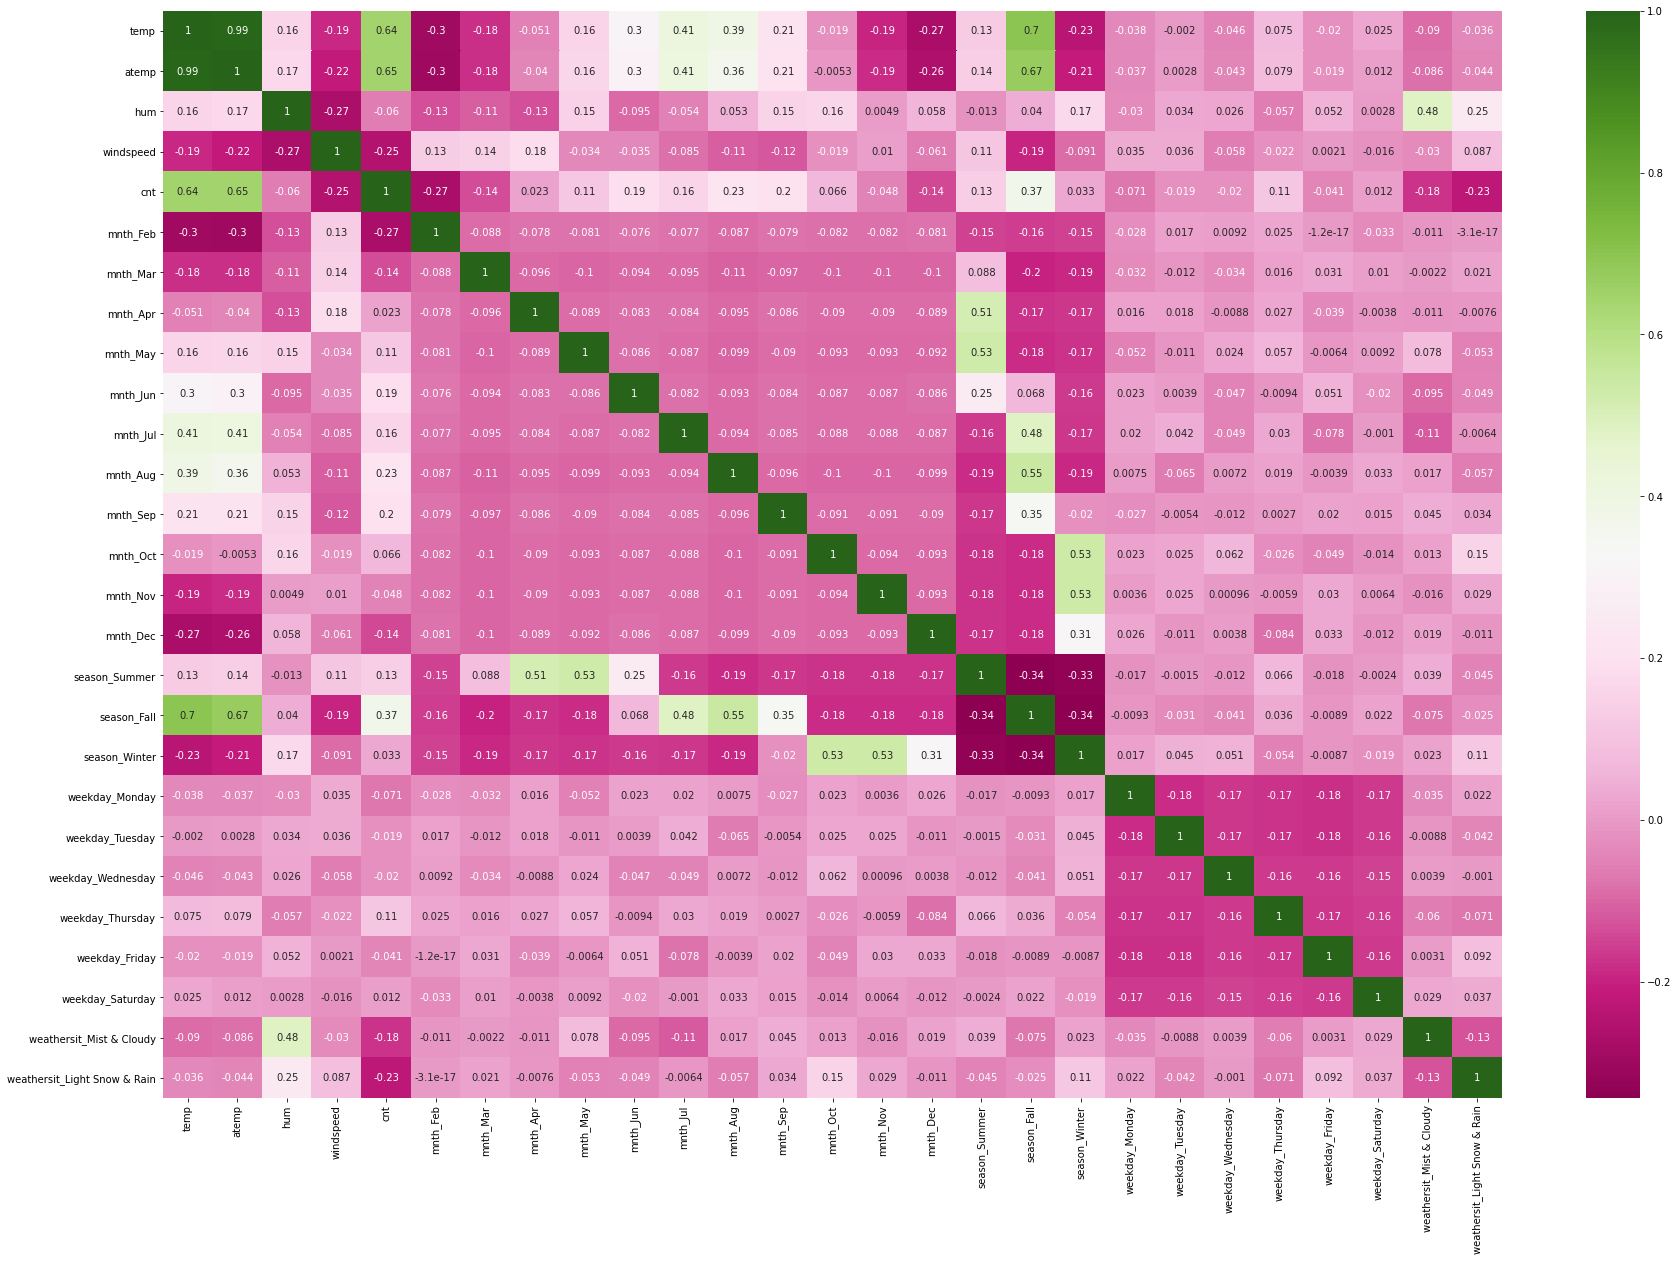

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(), annot=True, cmap="PiYG" )
plt.show()

In [35]:
y_train = train.pop('cnt')
X_train = train

In [36]:
X_train.head()

yr holiday workingday      temp     atemp       hum  windspeed  mnth_Feb  \
653  1       0          1  0.509887  0.501133  0.575354   0.300794         0   
576  1       0          1  0.815169  0.766351  0.725633   0.264686         0   
426  1       0          0  0.442393  0.438975  0.640189   0.255342         0   
728  1       0          1  0.245101  0.200348  0.498067   0.663106         0   
482  1       0          0  0.395666  0.391735  0.504508   0.188475         0   

     mnth_Mar  mnth_Apr  ...  season_Fall  season_Winter  weekday_Monday  \
653         0         0  ...            0              1               0   
576         0         0  ...            1              0               0   
426         1         0  ...            0              0               0   
728         0         0  ...            0              0               1   
482         0         1  ...            0              0               0   

     weekday_Tuesday  weekday_Wednesday  weekday_Thursday  weekday_Friday  \
653                0                  1                 0               0   
576                0                  1                 0               0   
426                0                  0                 0               0   
728                0                  0                 0               0   
482                0                  0                 0               0   

     weekday_Saturday  weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
653                 0                         0                             0  
576                 0                         0                             0  
426                 0                         1                             0  
728                 0                         0                             0  
482                 0                         1                             0  

[5 rows x 29 columns]

In [37]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Now we will build a model with 14 variables and than will Add and Remove variable one by one accordingly.

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
rfe = RFE(lm, 29)
rfe = rfe.fit(X_train,y_train)

In [41]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Dec', True, 1),
 ('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', True, 1),
 ('weekday_Thursday', True, 1),
 ('weekday_Friday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weathersit_Light Snow & Rain', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul',
       'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec',
       'season_Summer', 'season_Fall', 'season_Winter', 'weekday_Monday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

# Model 1

In [44]:
X_train_rfe = X_train[col]

In [45]:
#Adding a constant so that the regression line doesn't pass through the origin by default.
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [47]:
lm.params

const                           0.236909
yr                              0.230933
holiday                        -0.135245
workingday                     -0.060878
temp                            0.400268
atemp                           0.046419
hum                            -0.157757
windspeed                      -0.181137
mnth_Feb                        0.026274
mnth_Mar                        0.064256
mnth_Apr                        0.063451
mnth_May                        0.088216
mnth_Jun                        0.065595
mnth_Jul                        0.029539
mnth_Aug                        0.086485
mnth_Sep                        0.150171
mnth_Oct                        0.069373
mnth_Nov                        0.021921
mnth_Dec                        0.017765
season_Summer                   0.085854
season_Fall                     0.044097
season_Winter                   0.154579
weekday_Monday                  0.025639
weekday_Tuesday                 0.023966
weekday_Wednesda

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.09e-178
Time:                        12:16:15   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### P value for atemp is high so we are dropping it.

# Model 2
Rebuilding model without "atemp"

In [49]:
X_train1 = X_train_rfe.drop(['atemp'], axis = 1)

In [50]:
X_train_lm = sm.add_constant(X_train1)

In [51]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.33e-179
Time:                        12:16:15   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 3
Rebuilding model without "weekday_Tuesday"

In [53]:
X_train1 = X_train1.drop(['weekday_Tuesday'], axis = 1)

In [54]:
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.48e-180
Time:                        12:16:15   Log-Likelihood:                 523.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     482   BIC:                            -872.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 4
Rebuilding model without "weekday_Monday"

In [55]:
X_train1 = X_train1.drop(['weekday_Monday'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.35e-181
Time:                        12:16:15   Log-Likelihood:                 523.74
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     483   BIC:                            -879.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 4
Rebuilding model without "weekday_Saturday"

In [56]:
X_train1 = X_train1.drop(['weekday_Saturday'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.53e-182
Time:                        12:16:15   Log-Likelihood:                 523.63
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     484   BIC:                            -885.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 5
Building a model without "mnth_Nov"

In [57]:
X_train1 = X_train1.drop(['mnth_Nov'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          5.11e-183
Time:                        12:16:15   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     485   BIC:                            -891.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 6
Building a model without "mnth_Dec"

In [58]:
X_train1 = X_train1.drop(['mnth_Dec'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.82e-184
Time:                        12:16:15   Log-Likelihood:                 523.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     486   BIC:                            -897.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 7
Building a model without "mnth_Jul"

In [59]:
X_train1 = X_train1.drop(['mnth_Jul'], axis=1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.48e-185
Time:                        12:16:15   Log-Likelihood:                 523.31
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 8
Building a model without "mnth_Feb"

In [60]:
X_train1 = X_train1.drop(['mnth_Feb'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          6.80e-186
Time:                        12:16:15   Log-Likelihood:                 522.71
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 9
Building Model without "weekday_Wednesday"

In [61]:
X_train1 = X_train1.drop(['weekday_Wednesday'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.05e-186
Time:                        12:16:15   Log-Likelihood:                 522.07
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 10
Building a model without "mnth_Apr"

In [62]:
X_train1 = X_train1.drop(['mnth_Apr'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.54e-187
Time:                        12:16:15   Log-Likelihood:                 520.58
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 11
Building Model without "mnth_Jun"

In [63]:
X_train1 = X_train1.drop(['mnth_Jun'],axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.38e-188
Time:                        12:16:15   Log-Likelihood:                 520.12
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 12
Building a Model without "mnth_May"

In [64]:
X_train1 = X_train1.drop(['mnth_May'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.32e-188
Time:                        12:16:16   Log-Likelihood:                 518.70
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -925.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 13
Building a Model without "season_Fall"

In [65]:
X_train1 = X_train1.drop(['season_Fall'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.25e-189
Time:                        12:16:16   Log-Likelihood:                 517.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 14
Building a Model without "mnth_Mar"

In [66]:
X_train1 = X_train1.drop(['mnth_Mar'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.01e-189
Time:                        12:16:16   Log-Likelihood:                 515.96
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     494   BIC:                            -932.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 15
Building a Model without "weekday_Friday"

In [67]:
X_train1 = X_train1.drop(['weekday_Friday'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.89e-190
Time:                        12:16:16   Log-Likelihood:                 514.20
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     495   BIC:                            -934.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 16
Building a Model without "weekday_Thursday"

In [68]:
X_train1 = X_train1.drop(['weekday_Thursday'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.15e-190
Time:                        12:16:16   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     496   BIC:                            -938.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Now all the variables have p value less than 0.05 acceptance limit.

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF" , ascending= False)
vif

Features    VIF
0                          const  47.74
5                            hum   1.88
11                 season_Winter   1.72
4                           temp   1.59
12      weathersit_Mist & Cloudy   1.58
9                       mnth_Oct   1.49
7                       mnth_Aug   1.45
10                 season_Summer   1.38
8                       mnth_Sep   1.24
13  weathersit_Light Snow & Rain   1.24
6                      windspeed   1.19
2                        holiday   1.09
3                     workingday   1.09
1                             yr   1.03

### We can see that VIF value for 'const' is very high so we will remove 'const'

In [71]:
X_train1 = X_train1.drop(['const'], axis = 1)

# Model 17
 Building a model without 'const'

In [72]:
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.15e-190
Time:                        12:16:16   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     496   BIC:                            -938.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [73]:
vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF" , ascending= False)
vif

Features    VIF
4                            hum  16.46
3                           temp   9.88
5                      windspeed   3.68
2                     workingday   3.63
10                 season_Winter   2.27
11      weathersit_Mist & Cloudy   2.20
0                             yr   2.02
9                  season_Summer   1.83
8                       mnth_Oct   1.61
6                       mnth_Aug   1.60
7                       mnth_Sep   1.34
12  weathersit_Light Snow & Rain   1.19
1                        holiday   1.11

# Model 18
Building a model without "hum"

In [74]:
X_train1 = X_train1.drop(['hum'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.26e-187
Time:                        12:16:16   Log-Likelihood:                 501.68
No. Observations:                 510   AIC:                            -977.4
Df Residuals:                     497   BIC:                            -922.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [75]:
vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF" , ascending= False)
vif

Features   VIF
3                           temp  5.79
4                      windspeed  3.39
2                     workingday  3.17
9                  season_Winter  2.02
0                             yr  2.01
8                  season_Summer  1.82
7                       mnth_Oct  1.60
5                       mnth_Aug  1.59
10      weathersit_Mist & Cloudy  1.49
6                       mnth_Sep  1.34
1                        holiday  1.09
11  weathersit_Light Snow & Rain  1.09

# Model 19
Building a model without "mnth_Oct"

In [76]:
X_train1 = X_train1.drop(['mnth_Oct'], axis = 1)
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.37e-187
Time:                        12:16:16   Log-Likelihood:                 499.75
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     498   BIC:                            -924.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [77]:
vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF" , ascending= False)
vif

Features   VIF
3                           temp  5.67
4                      windspeed  3.39
2                     workingday  3.17
0                             yr  2.01
7                  season_Summer  1.81
5                       mnth_Aug  1.58
8                  season_Winter  1.55
9       weathersit_Mist & Cloudy  1.49
6                       mnth_Sep  1.31
1                        holiday  1.08
10  weathersit_Light Snow & Rain  1.08

# Residual Analysis
let's check wheather the error terms are normally distributed or not.

In [78]:
y_train_cnt = lm.predict(X_train_lm)

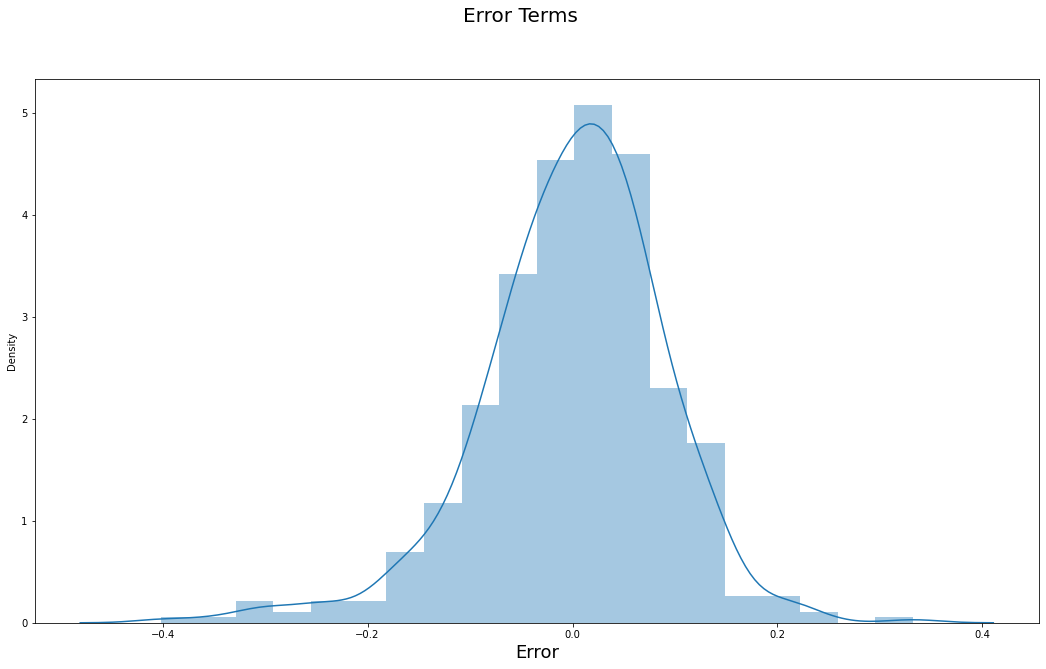

In [79]:
fig = plt.figure(figsize=(18,10))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms' , fontsize = 20)
plt.xlabel('Error', fontsize = 18)
plt.show()

# Making Prediction

In [80]:
num_vars = ['cnt', 'temp', 'atemp', 'hum','windspeed']

test[num_vars] = scaler.transform(test[num_vars])

In [81]:
test.describe()

temp       atemp         hum   windspeed         cnt    mnth_Feb  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.558941    0.532991    0.638508    0.313350    0.520592    0.100457   
std      0.233698    0.217888    0.148974    0.159947    0.218435    0.301297   
min      0.046591    0.025950    0.261915   -0.042808    0.048205    0.000000   
25%      0.354650    0.344751    0.527265    0.198517    0.377531    0.000000   
50%      0.558691    0.549198    0.627737    0.299459    0.524275    0.000000   
75%      0.759096    0.714132    0.743928    0.403048    0.672745    0.000000   
max      0.984424    0.980934    1.002146    0.807474    0.963300    1.000000   

         mnth_Mar    mnth_Apr    mnth_May    mnth_Jun  ...  season_Fall  \
count  219.000000  219.000000  219.000000  219.000000  ...   219.000000   
mean     0.054795    0.091324    0.086758    0.095890  ...     0.246575   
std      0.228100    0.288730    0.282125    0.295115  ...     0.432005   
min      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...     1.000000   

       season_Winter  weekday_Monday  weekday_Tuesday  weekday_Wednesday  \
count     219.000000      219.000000       219.000000         219.000000   
mean        0.232877        0.118721         0.123288           0.155251   
std         0.423633        0.324202         0.329520           0.362974   
min         0.000000        0.000000         0.000000           0.000000   
25%         0.000000        0.000000         0.000000           0.000000   
50%         0.000000        0.000000         0.000000           0.000000   
75%         0.000000        0.000000         0.000000           0.000000   
max         1.000000        1.000000         1.000000           1.000000   

       weekday_Thursday  weekday_Friday  weekday_Saturday  \
count        219.000000      219.000000        219.000000   
mean           0.141553        0.132420          0.173516   
std            0.349389        0.339723          0.379560   
min            0.000000        0.000000          0.000000   
25%            0.000000        0.000000          0.000000   
50%            0.000000        0.000000          0.000000   
75%            0.000000        0.000000          0.000000   
max            1.000000        1.000000          1.000000   

       weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
count                219.000000                    219.000000  
mean                   0.319635                      0.027397  
std                    0.467403                      0.163612  
min                    0.000000                      0.000000  
25%                    0.000000                      0.000000  
50%                    0.000000                      0.000000  
75%                    1.000000                      0.000000  
max                    1.000000                      1.000000  

[8 rows x 27 columns]

In [82]:
y_test = test.pop('cnt')
X_test = test

In [83]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   const                         219 non-null    float64 
 1   yr                            219 non-null    category
 2   holiday                       219 non-null    category
 3   workingday                    219 non-null    category
 4   temp                          219 non-null    float64 
 5   windspeed                     219 non-null    float64 
 6   mnth_Aug                      219 non-null    uint8   
 7   mnth_Sep                      219 non-null    uint8   
 8   season_Summer                 219 non-null    uint8   
 9   season_Winter                 219 non-null    uint8   
 10  weathersit_Mist & Cloudy      219 non-null    uint8   
 11  weathersit_Light Snow & Rain  219 non-null    uint8   
dtypes: category(3), float64(3), uint8(6)
memory usage

In [84]:
y_pred = lm.predict(X_test)

In [85]:
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.7962845715797978

In [86]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009675628905498706

### R2 score for test is 0.796 which is near to our train case of 0.836.
### Mean squared error is also low i.e 0.00967

# Evaluation of Model 

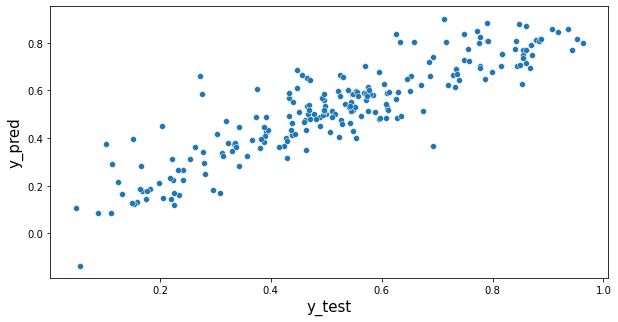

In [87]:
plt.figure(figsize= (10,5))
sns.scatterplot(y_test, y_pred)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15)
plt.show()


## We can see that the equation of our best fitted line is:

$ price = 0.1479 + 0.2324  \times  yr + 0.5164 \times temp + 0.0542 \times mnth_Aug + 0.1159 \times mnth_Sept + 0.1009 \times season_Summer + 0.1397 \times season_Winter - 0.1134 \times holiday - 0.0218 \times workingday - 0.1499 \times windspeed- 0.0843 \times weathersit_Mist_Cloudy - 0.2837 \times weathersit_Light Snow_Rain  $

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model